In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from pathlib import Path
# get notebook directory
NOTEBOOK_DIR = Path().resolve()

# project root = parent folder
ROOT = NOTEBOOK_DIR.parent

DATA_PROCESSED = ROOT / "data" / "processed"

df = pd.read_parquet(DATA_PROCESSED / "citypulse_health_daily.parquet")

df["date"] = pd.to_datetime(df["date"])
df = df.sort_values(["city", "date"])
df.head()

,date,city,air_score,temp_score,precip_score,wind_score,health_score,health_band
0,2022-01-01,Agadir,94.4,96.0,80.0,8.5,84.8,Excellent
1,2022-01-02,Agadir,93.3,96.8,80.0,0.0,83.7,Excellent
2,2022-01-03,Agadir,91.8,93.8,80.0,0.0,82.0,Excellent
3,2022-01-04,Agadir,91.4,87.2,80.0,0.0,79.9,Good
4,2022-01-05,Agadir,90.5,70.0,80.0,37.0,78.0,Good


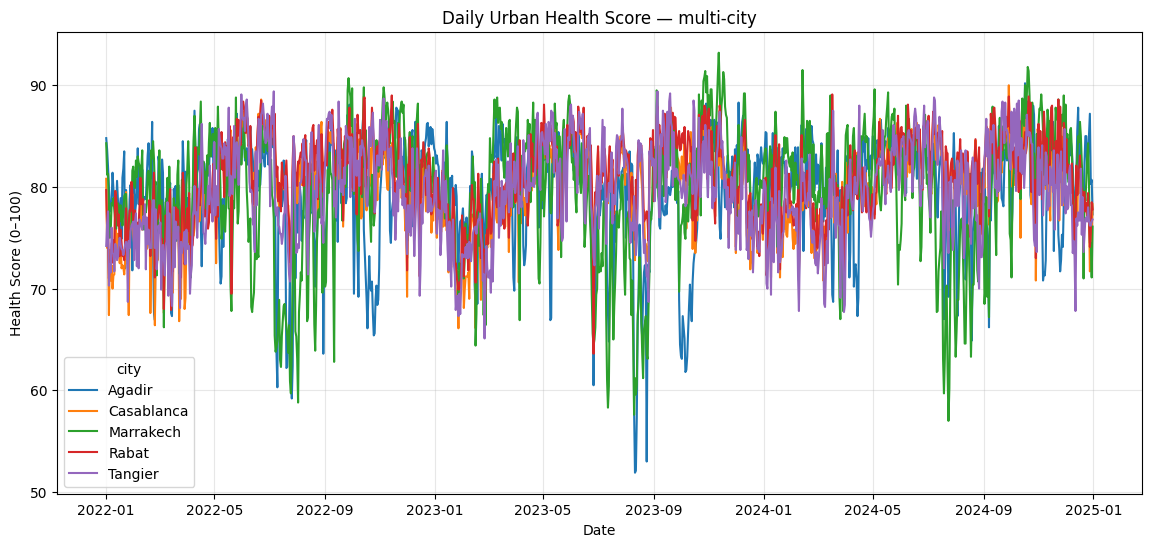

In [6]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x="date", y="health_score", hue="city")
plt.title("Daily Urban Health Score — multi-city")
plt.ylabel("Health Score (0–100)")
plt.xlabel("Date")
plt.grid(True, alpha=0.3)
plt.show()

In [11]:
events = pd.read_parquet(DATA_PROCESSED /"citypulse_events.parquet")
events["date"] = pd.to_datetime(events["date"])

In [16]:
events.head()

,date,city,event_type,severity
0,2022-01-22,Agadir,acute_low,28.0
1,2022-01-30,Agadir,acute_low,28.2
2,2022-02-23,Agadir,acute_low,32.3
3,2022-02-23,Agadir,sudden_drop,15.4
4,2022-02-24,Agadir,acute_low,33.1


In [17]:
events_full = events.merge(df[['city','date','health_score']], on=['city','date'], how='left')

events_full.to_parquet(DATA_PROCESSED / "citypulse_events_full.parquet", index=False)

print("✅ merged and saved as citypulse_events_full.parquet")

✅ merged and saved as citypulse_events_full.parquet


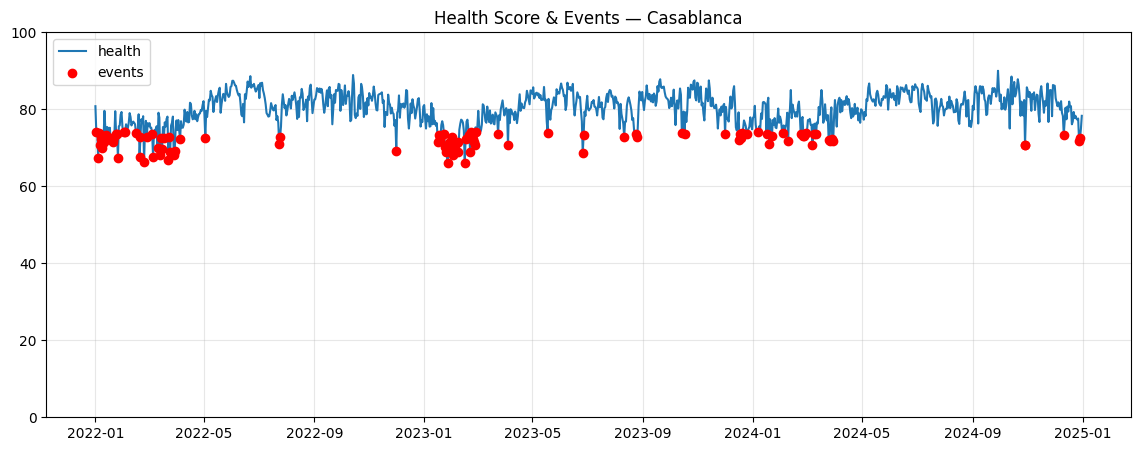

In [18]:
city = "Casablanca"

base = df[df.city==city]
ev = events[events.city==city]

plt.figure(figsize=(14,5))
plt.plot(base.date, base.health_score, label="health")
plt.scatter(ev.date, ev.date.map(base.set_index("date")["health_score"]), 
            color="red", label="events", zorder=3)
plt.title(f"Health Score & Events — {city}")
plt.ylim(0,100)
plt.grid(alpha=0.3)
plt.legend()
plt.show()